<a href="https://colab.research.google.com/github/AyodejiIbimilua/dsn_ai_bootcamp_2020/blob/main/submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installs catboost classifier
!pip install catboost

In [ ]:
#installs lightboost classifier
!pip install lightgbm

In [ ]:
#install mlen library
!pip install mlens

In [ ]:
#imports necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
from sklearn.feature_selection import f_classif
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection  import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from catboost import Pool, CatBoostClassifier, cv
from lightgbm import LGBMClassifier
from mlens.ensemble import SuperLearner
from sklearn import metrics

[MLENS] backend: threading


In [ ]:
#loads in the downloaded dataset from google drive
dataset = pd.read_csv("/content/drive/My Drive/DSN/Loan/Train.csv")

In [ ]:
#prints out the dataset
dataset

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0000,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,1.0,1.0,1.0,3.0,3.0,134.655,NaN,NaN,134.655,4000.5,17064.0,11376.0,60.0,17064.0,5962.0,NaN,1052.0,8.0000,2.0,NaN,12.0,12.0,4.0,0.0,NaN,NaN,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0000,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0,1.0,1.0,1.0,2.0,2.0,109.230,11385.24,14584.29,86.685,4161.0,13413.0,8942.0,304.0,13413.0,5780.0,NaN,2554.0,17.5000,0.0,0.0,16.0,24.0,8.0,0.0,NaN,NaN,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0000,6.282,NaN,956940.0,NaN,192944.0,1079864.0,NaN,NaN,0.0,16576457,22452691.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1597.5,4746.0,3164.0,60.0,15696.0,NaN,14508.0,70.0,0.6666,0.0,NaN,12.0,0.0,6.0,0.0,149.6805,NaN,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0000,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,NaN,771776.0,1186839.0,48187375,136297820.0,0.0,0.0,0.0,1.0,1.0,120.120,8580.00,0.00,85.800,1701.0,4014.0,2676.0,60.0,11679.0,NaN,NaN,522.0,7.8334,1.0,1.0,4.0,8.0,4.0,1.0,NaN,NaN,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0000,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,396391.0,818456.0,511535.0,28141427,15292757.0,0.0,0.0,0.0,3.0,3.0,104.535,8360.19,10326.45,115.335,1551.0,3285.0,2190.0,60.0,19437.0,12958.0,5202.0,272.0,1.0000,0.0,0.0,24.0,2.0,24.0,0.0,150.0135,NaN,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,Apcnt_999968,3740.0,0.01730,0.0000,0.0000,0.000,770998.0,9637475.0,4047934.0,11641992.0,19910965.0,NaN,983003.0,25985589.0,48187375,86615907.0,0.0,0.0,0.0,0.0,0.0,31.740,1662.15,0.00,15.810,2815.5,7299.0,4866.0,60772.0,15969.0,1034.0,NaN,864.0,21.6666,0.0,0.0,4.0,8.0,8.0,0.0,NaN,NaN,0.000000,9.09,0.730040,NaN,0.0,lending,591.048913,0.000000,0.241598,no
55996,Apcnt_999972,3360.0,2.01145,0.6252,0.0000,0.000,NaN,927765.0,NaN,NaN,1849306.0,571052.0,NaN,0.0,16576457,NaN,NaN,NaN,0.0,0.0,1.0,NaN,13350.00,NaN,NaN,1840.5,5475.0,3650.0,60.0,11589.0,1642.0,11589.0,242.0,14.6666,0.0,NaN,28.0,0.0,34.0,0.0,158.0250,136.5135,0.297913,30.30,0.498208,NaN,0.0,lending,NaN,0.000000,NaN,yes
55997,Apcnt_999980,3500.0,0.76640,0.0000,0.0000,0.000,118645.0,3662435.0,3662435.0,3585024.0,704090.0,NaN,2765401.0,4226874.0,21973443,87508273.0,0.0,0.0,0.0,2.0,2.0,119.565,2206.95,12690.00,119.565,1059.0,3924.0,2616.0,2980.0,12135.0,NaN,NaN,232.0,22.3334,0.0,0.0,6.0,0.0,4.0,0.0,NaN,NaN,0.550000,3.03,0.450512,0.0,0.0,lending,1252.474467,2.000000,0.163153,no
55998,Apcnt_999988,3280.0,0.05235,2.0916,2.2212,0.000,NaN,3458599.0,NaN,115533.0,3458599.0,508812.0,NaN,0.0,38549900,20238892.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,2373.0,NaN,NaN,60.0,25641.0,852.0,NaN,104.0,57.5000,1.0,NaN,10.0,2.0,8.0,1.0,NaN,150.0000,0.942854,0.00,0.705048,1.0,0.0,charge,NaN,0.000000,0.002997,no


In [ ]:
#prints out information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Applicant_ID    56000 non-null  object 
 1   form_field1     53471 non-null  float64
 2   form_field2     52156 non-null  float64
 3   form_field3     55645 non-null  float64
 4   form_field4     55645 non-null  float64
 5   form_field5     55645 non-null  float64
 6   form_field6     42640 non-null  float64
 7   form_field7     50837 non-null  float64
 8   form_field8     42640 non-null  float64
 9   form_field9     47992 non-null  float64
 10  form_field10    55645 non-null  float64
 11  form_field11    24579 non-null  float64
 12  form_field12    46105 non-null  float64
 13  form_field13    50111 non-null  float64
 14  form_field14    56000 non-null  int64  
 15  form_field15    33525 non-null  float64
 16  form_field16    42964 non-null  float64
 17  form_field17    44849 non-null 

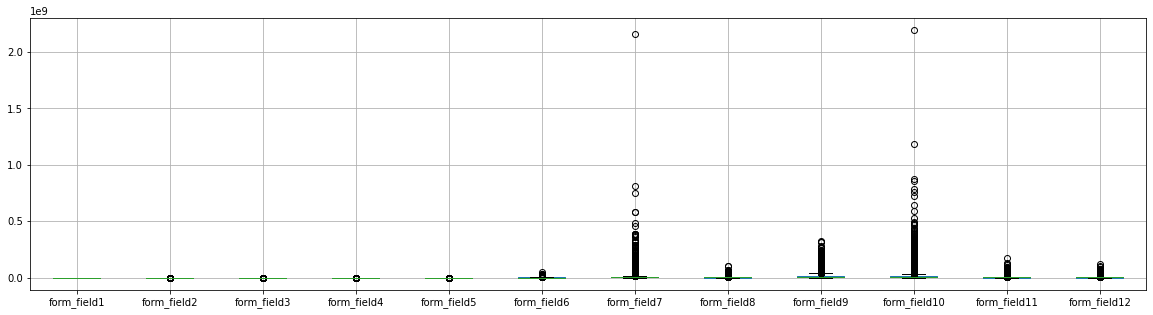

In [ ]:
#does a boxplot on the columns
dataset.boxplot(['form_field1', 'form_field2', 'form_field3', 'form_field4', 
                 'form_field5', 'form_field6', 'form_field7', 'form_field8', 
                 'form_field9', 'form_field10', 'form_field11', 'form_field12'], figsize=(20,5))

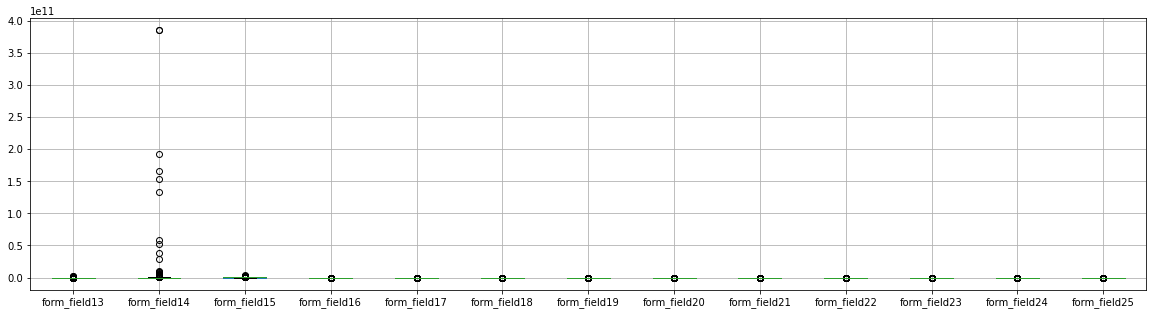

In [ ]:
dataset.boxplot(['form_field13', 'form_field14', 'form_field15', 'form_field16', 
                 'form_field17', 'form_field18', 'form_field19', 'form_field20', 
                 'form_field21', 'form_field22', 'form_field23', 'form_field24', 'form_field25'], figsize=(20,5))

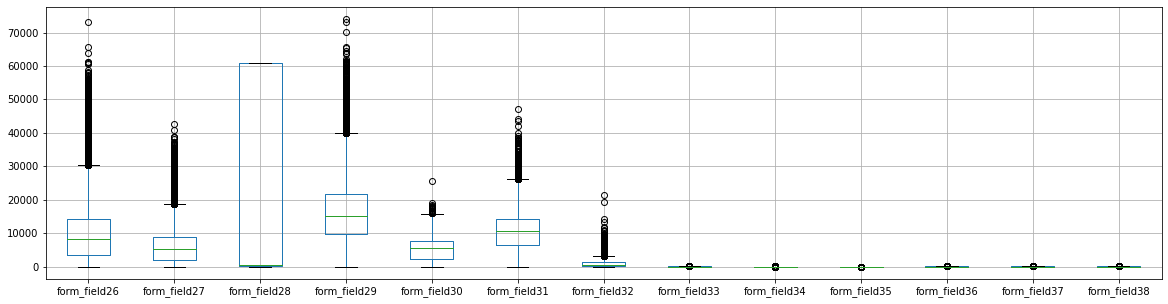

In [ ]:
dataset.boxplot(['form_field26', 'form_field27', 'form_field28', 'form_field29', 'form_field30', 
                 'form_field31', 'form_field32', 'form_field33', 'form_field34', 'form_field35', 
                 'form_field36', 'form_field37', 'form_field38'], figsize=(20, 5))

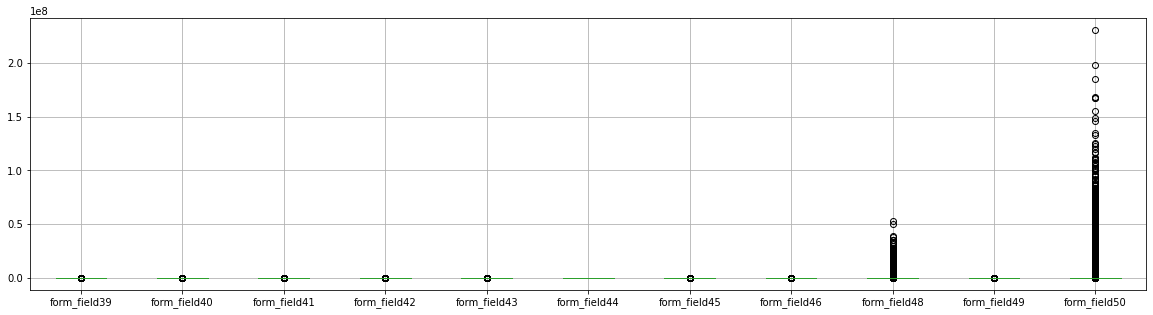

In [ ]:
dataset.boxplot(['form_field39', 'form_field40', 'form_field41', 'form_field42', 'form_field43', 
                 'form_field44', 'form_field45', 'form_field46', 'form_field48', 'form_field49', 'form_field50'], figsize=(20, 5))

In [ ]:
#describes the dataset
dataset.describe ()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,5.564500e+04,2.457900e+04,4.610500e+04,5.011100e+04,5.600000e+04,3.352500e+04,42964.000000,44849.000000,45598.000000,55996.000000,55645.000000,40146.000000,35600.000000,27877.000000,42703.000000,50550.000000,48562.000000,46701.000000,55645.000000,55645.000000,30491.000000,16592.000000,50550.000000,54744.000000,55645.000000,32852.000000,54005.000000,50550.000000,55645.000000,51789.000000,12271.000000,17771.000000,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,3.511100e+04,55645.000000,4.494400e+04
mean,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,1.185585e+07,2.054715e+06,2.771113e+06,6.009944e+06,6.914875e+07,1.145041e+08,0.230425,0.265692,0.271832,0.948800,1.031593,86.500380,6628.316381,6452.875072,104.558516,2624.555935,10106.554899,6190.516948,17274.315141,16518.540695,5213.246663,10857.565755,938.345321,13.926583,0.230245,0.199866,12.859069,8.480435,8.601420,0.090849,147.797977,108.117363,0.368215,6.634511,0.563377,0.072520,0.095371,3.052449e+05,1.049061,6.005862e+05
std,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,2.669459e+07,4.912980e+06,4.544838e+06,2.335893e+07,2.713995e+09,1.153842e+08,0.621833,0.720198,0.725434,1.736454,1.785122,53.445528,5661.059297,5739.968774,436.670719,1964.226548,8796.472481,5390.915344,26930.742020,9666.183962,3124.491488,6049.678489,1044.597044,15.208396,0.683063,0.574002,10.621984,9.328810,7.969215,0.423802,45.085889,36.765769,0.412858,6.378946,0.196973,0.291146,0.335210,1.647757e+06,1.806160,5.842405e+06
min,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.395430e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.255000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166600,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.021000,0.000000,0.000000,0.000000,0.048528,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,4.500730e+05,2.172565e+05,2.758010e+05,1.921660e+05,1.657646e+07,5.007636e+07,0.000000,0.000000,0.000000,0.000000,0.000000,40.305000,1068.667500,797.145000,14.865000,1231.500000,3375.000000,2068.000000,60.000000,9765.000000,2312.000000,6297.000000,194.000000,2.333400,0.000000,0.000000,6.000000,2.000000,4.000000,0.000000,136.191750,87.055500,0.000000,2.020000,0.411672,0.000000,0.000000,7.710079e+01,0.000000,4.560141e-02
50%,3484.000000,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,3.707559e+06,6.986440e+05,1.163110e+06,1.605792e+06,2.814143e+07,8.442428e+07,0.000000,0.000000,0.000000,0.000000,0.000000,89.167500,5976.225000,5548.935000,60.660000,2203.500000,8214.000000,5110.000000,486.000000,15057.000000,5658.000000,10584.000000,598.000000,7.833400,0.000000,0.000000,10.000000,6.000000,6.000000,0.000000,150.000000,118.441500,0.220000,5.050000,0.588648,0.000000,0.000000,3.181243e+02,0.000000,1.703996e-01
75%,3620.000000,0.719512,1.282000,0.000000,0.000000,5.259280e+05,6.993831e+06,3.751516e+06,1.694552

In [ ]:
#checks for numbr of zeros in each columns
(dataset == 0).sum()

Applicant_ID          0
form_field1           0
form_field2        4453
form_field3       25728
form_field4       47900
form_field5       50322
form_field6        7454
form_field7        2083
form_field8        1772
form_field9         246
form_field10       7190
form_field11         58
form_field12       3583
form_field13       9016
form_field14       1446
form_field15          0
form_field16      35943
form_field17      36859
form_field18      37265
form_field19      33598
form_field20      31471
form_field21          0
form_field22       5205
form_field23       4785
form_field24       3262
form_field25         42
form_field26         59
form_field27         57
form_field28      11546
form_field29          3
form_field30         10
form_field31         14
form_field32         42
form_field33          0
form_field34      46890
form_field35      28090
form_field36          0
form_field37      11410
form_field38       4864
form_field39      48194
form_field40          0
form_field41    

In [ ]:
#columns that have quite the same amount of numbers are filled with mode
#columns with a lot of missing values are filled with -999
#columns with little missing valus are filled with mean
#removes form_field5 and form_field14

remove_col = ['form_field5', 'form_field14']
fill_mode = ['form_field16', 'form_field17', 'form_field18', 'form_field19', 'form_field20', 'form_field34', 'form_field35', 'form_field39', 'form_field45', 'form_field46', 'form_field49']
fill_999 = ['form_field6', 'form_field8', 'form_field9', 'form_field11', 'form_field12', 'form_field13', 'form_field15', 'form_field21', 'form_field22', 'form_field23', 'form_field24', 'form_field26', \
            'form_field27', 'form_field30', 'form_field31', 'form_field32', 'form_field40', 'form_field41', 'form_field48']
fill_mean = ['form_field1', 'form_field2', 'form_field3', 'form_field4', 'form_field7', 'form_field10', 'form_field25', 'form_field28', 'form_field29', 'form_field33', 'form_field36', 'form_field37', \
            'form_field38', 'form_field42', 'form_field43', 'form_field44', 'form_field50']

In [ ]:
dataset.drop(remove_col, axis=1, inplace=True)

In [ ]:
#preprocsses the dataset
def processes(dataset, columns):
  dataset = dataset.loc[:, columns]
  
  for column in columns:
    if dataset[column].dtype == object:
      dataset[column] = dataset[column].fillna(str(dataset[column].mode()))
      dataset[column] = dataset[column].map({"charge": 0, "lending": 1})
    if column in fill_999:
      dataset[column] = dataset[column].fillna(-9999)
    if column in fill_mode:
      dataset[column] = dataset[column].fillna(dataset[column].mode()[0])
    if column in fill_mean:
      dataset[column] = dataset[column].fillna(dataset[column].mean())
  

  dataset = pd.get_dummies(dataset, drop_first=True)
  new_cl = list(dataset.columns)
  scaler = MinMaxScaler()
  dataset = scaler.fit_transform(dataset)

  dataset = pd.DataFrame(dataset, columns=new_cl)

  return dataset


In [ ]:
#selects columns to use
cols = list(dataset.columns)[1:-1]

In [ ]:
#applies preprocessing and splits the data into train test and validation set
seed = 42

X = processes(dataset, cols)
y = dataset["default_status"].map({"no": 0, "yes":1})

X_train, X_split, y_train, y_split = train_test_split(X, y, test_size=0.3, random_state=seed)

X_test, X_val, y_test, y_val = train_test_split(X_split, y_split, test_size=0.5, random_state=seed)

In [ ]:
#checks to ensure there are no missing values after preprocessing
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 48 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   form_field1   56000 non-null  float64
 1   form_field2   56000 non-null  float64
 2   form_field3   56000 non-null  float64
 3   form_field4   56000 non-null  float64
 4   form_field6   56000 non-null  float64
 5   form_field7   56000 non-null  float64
 6   form_field8   56000 non-null  float64
 7   form_field9   56000 non-null  float64
 8   form_field10  56000 non-null  float64
 9   form_field11  56000 non-null  float64
 10  form_field12  56000 non-null  float64
 11  form_field13  56000 non-null  float64
 12  form_field15  56000 non-null  float64
 13  form_field16  56000 non-null  float64
 14  form_field17  56000 non-null  float64
 15  form_field18  56000 non-null  float64
 16  form_field19  56000 non-null  float64
 17  form_field20  56000 non-null  float64
 18  form_field21  56000 non-nu

In [ ]:
#loads the train data
X_train

,form_field1,form_field2,form_field3,form_field4,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
12406,0.378022,0.007497,0.110549,0.000000,0.000000,0.007737,0.000000,0.025204,0.009293,0.028806,0.000081,0.000004,0.007207,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.238852,0.122601,0.277866,0.357171,0.000000,0.251847,0.478073,0.000000,0.349561,0.085620,0.000000,0.0,0.080808,0.132075,0.051282,0.000000,0.000000,0.975446,0.277780,0.021978,0.979060,0.2,0.0,0.0,0.000000,0.000000,1.240710e-09
18739,0.564835,0.072928,0.054741,0.070255,0.007076,0.005850,0.018675,0.124467,0.009575,0.000000,0.000081,0.000478,0.032909,0.000000,0.000000,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,0.242615,0.152609,0.338137,0.420879,0.000000,0.245677,0.514023,0.000000,0.399840,0.147091,0.047619,0.0,0.040404,0.264151,0.012821,0.000000,0.000000,0.000000,0.053570,0.098901,0.946569,0.0,0.0,0.0,0.000000,0.000000,3.581734e-09
3350,0.920879,0.030571,0.000000,0.000000,0.012880,0.004819,0.055831,0.007378,0.006285,0.000000,0.017311,0.000221,0.066273,0.000000,0.000000,0.000000,0.000000,0.000000,0.840223,0.000000,0.000000,0.238970,0.061211,0.181425,0.223968,1.000000,0.098750,0.289825,0.000000,0.325858,0.004392,0.000000,0.0,0.020202,0.000000,0.012821,0.000000,0.000000,0.989094,0.000000,0.076923,0.814391,0.0,0.0,0.0,0.000000,0.000000,2.602676e-03
20464,0.426374,0.035945,0.035181,0.000000,0.011072,0.000357,0.005672,0.039603,0.000387,0.000000,0.000081,0.000395,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.093275,0.093275,0.238852,0.206288,0.300886,0.381505,0.005002,0.227169,0.507159,0.000000,0.384635,0.124040,0.047619,0.0,0.054844,0.150943,0.025641,0.000000,0.000000,0.988541,0.210525,0.032967,1.000000,0.0,0.0,0.0,0.000188,0.000000,1.581976e-09
26757,0.437363,0.011521,0.010413,0.048499,0.001791,0.002880,0.000917,0.004668,0.005852,0.004360,0.001103,0.000369,0.011276,0.000000,0.000000,0.000000,0.000000,0.000000,0.843760,0.176977,0.000000,0.240995,0.068324,0.137618,0.208926,0.002008,0.272831,0.536246,0.000000,0.336208,0.304062,0.047619,0.1,0.050505,0.094340,0.051282,0.000000,0.000000,0.000000,0.240000,0.054945,0.668384,0.0,0.0,0.0,0.000188,0.000000,1.853631e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44732,0.356044,0.052823,0.115458,0.103399,0.008166,0.000196,0.004183,0.006777,0.000197,0.003095,0.000081,0.000040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.180704,0.349089,0.432456,0.000000,0.296290,0.332639,0.390950,0.370196,0.006586,0.000000,0.0,0.272727,0.150943,0.076923,0.047619,0.954917,0.000000,0.215910,0.142857,0.113324,0.0,0.2,1.0,0.000000,0.061706,8.089899e-10
54343,0.494505,0.006295,0.111878,0.000000,0.029130,0.000764,0.014922,0.017978,0.001866,0.014552,0.026716,0.000753,0.011131,0.000000,0.000000,0.000000,0.000000,0.000000,0.843471,0.000000,0.000000,0.240913,0.125710,0.250486,0.328231,0.000000,0.181468,0.479760,0.410132,0.350327,0.360045,0.000000,0.0,0.080808,0.132075,0.012821,0.000000,0.951502,0.000000,0.340910,0.021978,0.741957,0.0,0.0,1.0,0.000000,0.005815,8.845272e-10
38158,0.784615,0.000000,0.000000,0.000000,0.000744,0.002087,0.000381,0.015137,0.004101,0.000000,0.034153,0.000169,0.028839,0.000000,0.047619,0.047619,0.071429,0.068966,0.848473,0.000000,0.000000,0.243733,0.368163,0.346891,0.430133,1.0

In [ ]:
#checks for feature importance using univariate analysis
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)


dfscores = pd.DataFrame(fs.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']
print(featureScores.nlargest(10,'Score'))

        Features        Score
0    form_field1  7474.156154
39  form_field42  4588.579224
23  form_field26  2450.058246
6    form_field8  2291.694222
44  form_field47  2221.863771
24  form_field27  2176.717011
7    form_field9  2151.484646
1    form_field2  2064.216212
25  form_field28  1933.130733
29  form_field32  1886.508414


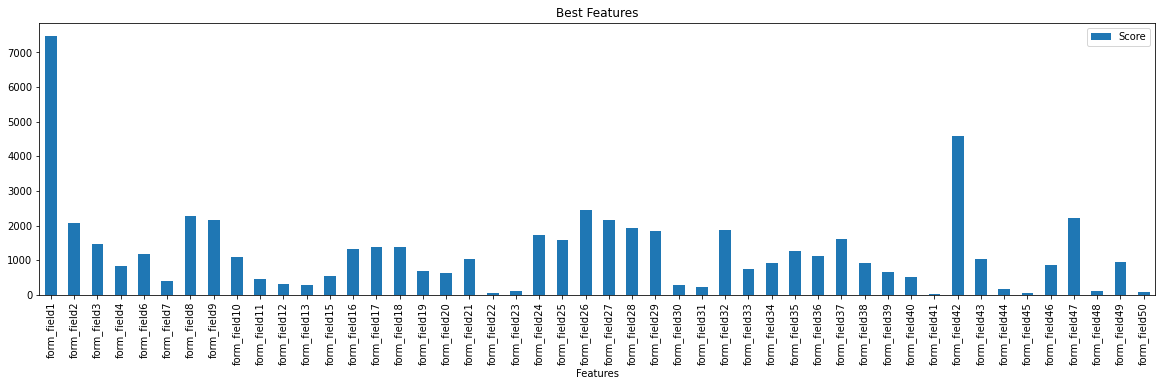

In [ ]:
featureScores.plot(kind="bar", x="Features", y="Score", figsize=(20,5), title="Best Features")

In [ ]:
#defines some base line models

#xgboost model gotten through hyperparameters tuning
XGB = xgbostfinal = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=21.655,
              learning_rate=0.2125, max_delta_step=0, max_depth=8,
              min_child_weight=0.17909999999999998, missing=None,
              n_estimators=700, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
              subsample=0.67, verbosity=1)

#untuned catboost model
CBU = CatBoostClassifier()

#catboost model parameters gotten through hyperparameters tuning
CBN = CatBoostClassifier(iterations=2200, learning_rate=0.01, l2_leaf_reg=1, depth=8, early_stopping_rounds=500, verbose=200, rsm=0.98, loss_function= 'Logloss', eval_metric='AUC', random_seed=42)

CB = CatBoostClassifier(iterations=2200, learning_rate=0.01, l2_leaf_reg=1, depth=8, use_best_model=True, early_stopping_rounds=500, verbose=200, rsm=0.98, loss_function= 'Logloss', eval_metric='AUC', random_seed=42)

GB = GradientBoostingClassifier()

LOR = LogisticRegression()

RC = RidgeClassifier()

LGM = LGBMClassifier(max_depth=4)

HB = HistGradientBoostingClassifier(learning_rate=0.01, max_iter=10000)

In [ ]:
from sklearn.ensemble import VotingClassifier

estimators = [('cb', CBN), ('cbu', CBU), ('lgm', LGM)]

voter = VotingClassifier(estimators=estimators, voting='soft', weights=[3,3,1])

voter.fit(X_train, y_train)

0:	total: 63.9ms	remaining: 2m 20s
200:	total: 12.1s	remaining: 2m
400:	total: 23.9s	remaining: 1m 47s
600:	total: 35.7s	remaining: 1m 34s
800:	total: 47.5s	remaining: 1m 22s
1200:	total: 1m 11s	remaining: 59.1s
1400:	total: 1m 22s	remaining: 47.2s
1600:	total: 1m 34s	remaining: 35.4s
1800:	total: 1m 46s	remaining: 23.5s
2000:	total: 1m 57s	remaining: 11.7s
2199:	total: 2m 9s	remaining: 0us
Learning rate set to 0.049348
0:	learn: 0.6634800	total: 34.3ms	remaining: 34.3s
1:	learn: 0.6356013	total: 67.3ms	remaining: 33.6s
2:	learn: 0.6127237	total: 100ms	remaining: 33.2s
3:	learn: 0.5923518	total: 133ms	remaining: 33.2s
4:	learn: 0.5734968	total: 167ms	remaining: 33.2s
5:	learn: 0.5576979	total: 202ms	remaining: 33.4s
6:	learn: 0.5429202	total: 234ms	remaining: 33.2s
7:	learn: 0.5299210	total: 267ms	remaining: 33s
8:	learn: 0.5207448	total: 299ms	remaining: 33s
9:	learn: 0.5121658	total: 330ms	remaining: 32.7s
10:	learn: 0.5029612	total: 362ms	remaining: 32.6s
11:	learn: 0.4960580	total:

VotingClassifier(estimators=[('cb',
                              <catboost.core.CatBoostClassifier object at 0x7fbd2dd501d0>),
                             ('cbu',
                              <catboost.core.CatBoostClassifier object at 0x7fbd2bf40a90>),
                             ('lgm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=4,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
          

In [ ]:
#calculates the accuracy score on validation set
votpre = voter.predict(X_val)

accuracy_score(y_val, votpre)

0.8051190476190476

In [ ]:
#calculates the auc
fpr, tpr, thresholds = metrics.roc_curve(y_val, votpre)
metrics.auc(fpr, tpr)

0.6853161471760019

In [ ]:
#loads and preprocesses the testdata
test_data = pd.read_csv("/content/drive/My Drive/DSN/Loan/Test.csv")

final_test = processes(test_data, cols)

In [ ]:
#trains voting classifier model on whole dataset
estimators = [('cb', CBN), ('cbu', CBU), ('lgm', LGM)]

voter = VotingClassifier(estimators=estimators, voting='soft', weights=[3,3,1])

voter.fit(X, y)

In [ ]:
#makes probability prediction on new data
y_sub = voter.predict_proba(final_test)[:,1]

In [ ]:
submission = pd.concat([test_data["Applicant_ID"], pd.Series(y_sub, name="default_status")], axis=1)

submission.to_csv("/content/drive/My Drive/DSN/Loan/suma4.csv", index=False)